In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig

plt.rcParams['mathtext.fontset'],plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 18})

# 5.2 - Collect PicoSampler Data

We collect data with the PicoSampler from class. We know that the ADC samples at $2^{16}$ bits and samples at $62.5$ MHz / $N$ where $N$ is the divisor number. We chose a Voltage range of 2 Volts for $V_{pp} = 1 V$

In [3]:
import ugradio

In [37]:
data_0 = ugradio.pico.capture_data("2V", divisor=10) #625 kHz

In [38]:
data_1 = ugradio.pico.capture_data("2V", divisor=10) #1.25 MHz

In [39]:
data_2 = ugradio.pico.capture_data("2V", divisor=10) #1.875 MHz

In [40]:
data_3 = ugradio.pico.capture_data("2V", divisor=10) #2.5 MHz

In [41]:
data_4 = ugradio.pico.capture_data("2V", divisor=10) #3.125 MHz

In [42]:
data_5 = ugradio.pico.capture_data("2V", divisor=10) #3.75 MHz

In [43]:
data_6 = ugradio.pico.capture_data("2V", divisor=10) #4.375 MHz

In [44]:
data_7 = ugradio.pico.capture_data("2V", divisor=10) #5 MHz

In [45]:
data_8 = ugradio.pico.capture_data("2V", divisor=10) #5.625 MHz

In [46]:
data_9 = ugradio.pico.capture_data("2V", divisor=10) #6.25 MHz

## Save Data to `.csv`

In [48]:
data_dict = {"0.625 MHz":data_0[0,0,:], "1.25 MHz":data_1[0,0,:], "1.875 MHz":data_2[0,0,:],
             "2.5 MHz":data_3[0,0,:], "3.125 MHz":data_4[0,0,:], "3.75 MHz":data_5[0,0,:],
            "4.375 MHz":data_6[0,0,:], "5 MHz":data_7[0,0,:], "5.625 MHz":data_8[0,0,:], "6.25 MHz": data_9[0,0,:]}

data_df = pd.DataFrame(data_dict)

In [63]:
data_df.to_csv("final_data.csv")

In [82]:
data_df = pd.read_csv("final_data.csv")

data_df

,Unnamed: 0,0.625 MHz,1.25 MHz,1.875 MHz,2.5 MHz,3.125 MHz,3.75 MHz,4.375 MHz,5 MHz,5.625 MHz,6.25 MHz
0,0,6912,-9984,-5888,11264,-10496,-4096,-15360,7680,1536,12800
1,1,14080,-15360,-12544,-2304,10496,-5888,7936,15360,10240,12800
2,2,16128,512,13568,-7680,-10496,13312,10496,2048,15104,12800
3,3,11776,15616,4096,14592,10496,-15872,-14592,-14080,14080,12800
4,4,3072,8960,-16128,-15872,-10496,12288,-1536,-10752,7680,12800
...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,-12800,-15872,14592,14848,-11008,2048,15872,10240,15360,14848
15996,15996,-16128,-2304,-11008,-8448,11008,7680,-3584,-8192,11008,14848
15997,15997,-13312,14592,-7936,-1280,-11008,-14336,-13568,-15360,2304,14848
15998,15998,-5376,11264,15872,10496,11008,15616,12032,-1280,-7168,14848


## Show Data

In [83]:
ν_s  = 62.5e6 / 10 
Δt = 1 / ν_s

samples = np.arange(0, len(data_df["2.5 MHz"]))
times = samples * Δt

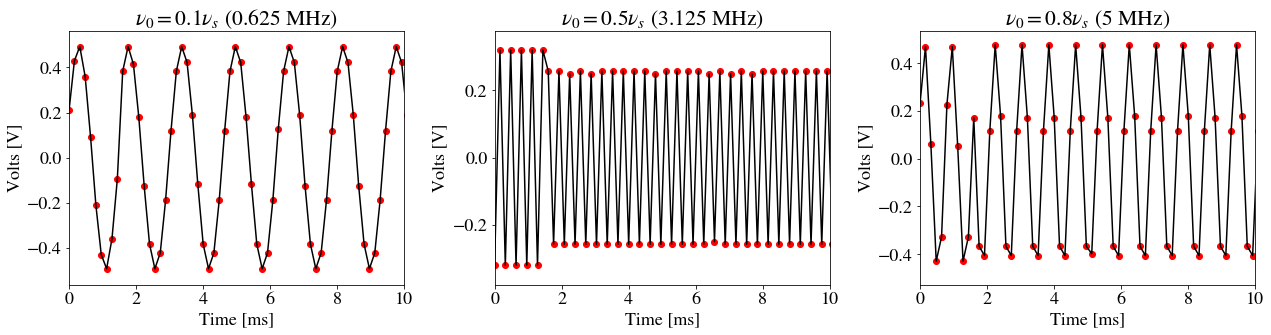

In [5]:
# plt.figure(figsize=(12,8))
# for key in data_dict.keys(): 
#     plt.plot(times*1000000, data_df[key]/(2**15), label=key)
fig, axes = plt.subplots(1,3, figsize=(18, 5))

axes[0].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
axes[0].plot(times*1e6, data_df["0.625 MHz"]/(2**15), color="black")
axes[0].scatter(times*1e6, data_df["0.625 MHz"]/(2**15), marker="o", color="red")
axes[0].set_xlim(0,10)
axes[0].set_ylabel("Volts [V]")
axes[0].set_xlabel("Time [ms]")

axes[1].set_title("$\\nu_0 = 0.5 \\nu_s$ (3.125 MHz)")
axes[1].plot(times*1e6, data_df["3.125 MHz"]/(2**15), color="black")
axes[1].scatter(times*1e6, data_df["3.125 MHz"]/(2**15), marker="o", color="red")
axes[1].set_xlim(0,10)
axes[1].set_ylabel("Volts [V]")
axes[1].set_xlabel("Time [ms]")

axes[2].set_title("$\\nu_0 = 0.8 \\nu_s$ (5 MHz)")
axes[2].plot(times*1e6, data_df["5 MHz"]/(2**15),color="black")
axes[2].scatter(times*1e6, data_df["5 MHz"]/(2**15), marker="o", color="red")
axes[2].set_xlim(0,10)
axes[2].set_ylabel("Volts [V]")
axes[2].set_xlabel("Time [ms]")
fig.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


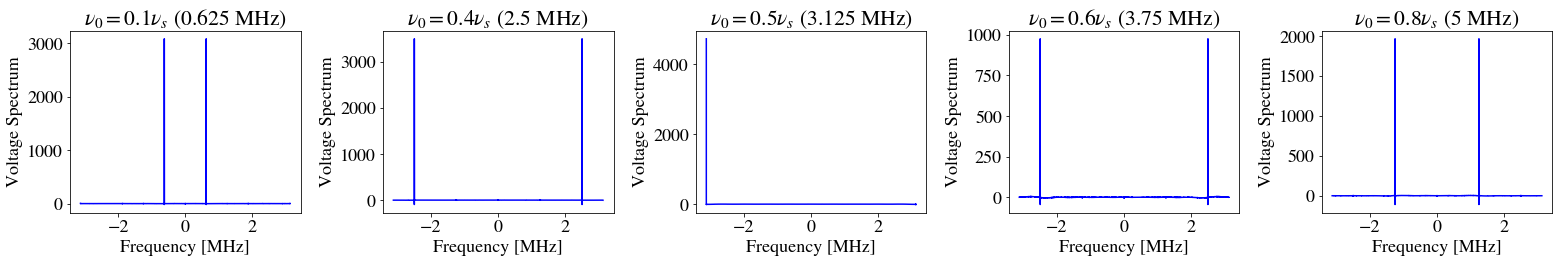

In [6]:
# plt.figure(figsize=(12,8))
# for key in data_dict.keys(): 
#     plt.plot(np.fft.fftfreq(16000, 1/ν_s)/1e6, np.fft.fft(data_df[key]/(2**15)), label=key)
    
# # plt.xlim(0,5)
# plt.legend(loc=(1.05,0.4))
# # plt.ylabel("Volts [V]")
# plt.set_xlabel("Frequency [MHz]")
# plt.show()

fig, axes = plt.subplots(1,5, figsize=(22, 4))

axes[0].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.fft.fftshift(np.fft.fft(data_df["0.625 MHz"]/(2**15))), color="blue")
axes[0].set_xlabel("Frequency [MHz]")
axes[0].set_ylabel("Voltage Spectrum")

axes[1].set_title("$\\nu_0 = 0.4 \\nu_s$ (2.5 MHz)")
axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.fft.fftshift(np.fft.fft(data_df["2.5 MHz"]/(2**15))), color="blue")
axes[1].set_xlabel("Frequency [MHz]")
axes[1].set_ylabel("Voltage Spectrum")

axes[2].set_title("$\\nu_0 = 0.5 \\nu_s$ (3.125 MHz)")
axes[2].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.fft.fftshift(np.fft.fft(data_df["3.125 MHz"]/(2**15))), color="blue")
axes[2].set_xlabel("Frequency [MHz]")
axes[2].set_ylabel("Voltage Spectrum")

axes[3].set_title("$\\nu_0 = 0.6 \\nu_s$ (3.75 MHz)")
axes[3].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.fft.fftshift(np.fft.fft(data_df["3.75 MHz"]/(2**15))), color="blue")
axes[3].set_xlabel("Frequency [MHz]")
axes[3].set_ylabel("Voltage Spectrum")

axes[4].set_title("$\\nu_0 = 0.8 \\nu_s$ (5 MHz)")
axes[4].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.fft.fftshift(np.fft.fft(data_df["5 MHz"]/(2**15))),color="blue")
axes[4].set_xlabel("Frequency [MHz]")
axes[4].set_ylabel("Voltage Spectrum")
fig.tight_layout()
plt.show()

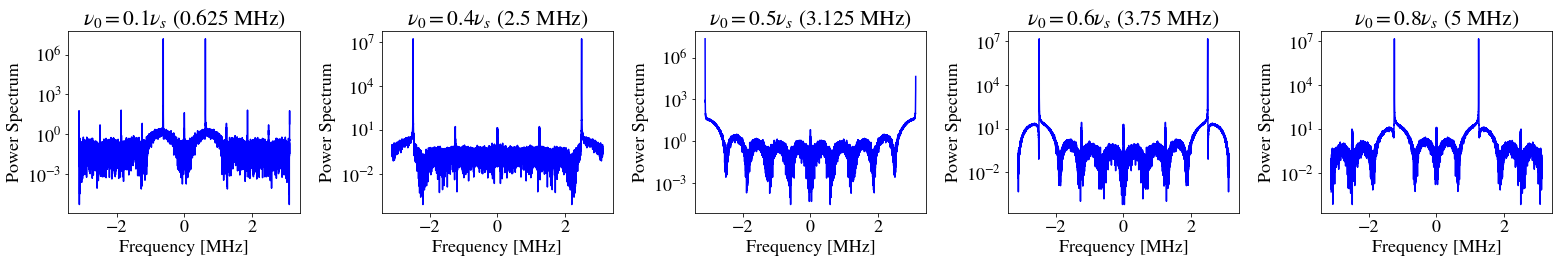

In [6]:
# plt.figure(figsize=(12,8))
# for key in data_dict.keys(): 
#     plt.plot(np.fft.fftfreq(16000, 1/ν_s)/1e6, np.fft.fft(data_df[key]/(2**15)), label=key)
    
# # plt.xlim(0,5)
# plt.legend(loc=(1.05,0.4))
# # plt.ylabel("Volts [V]")
# plt.set_xlabel("Frequency [MHz]")
# plt.show()

fig, axes = plt.subplots(1,5, figsize=(22, 4))

axes[0].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["0.625 MHz"]/(2**15))))**2, color="blue")
axes[0].set_xlabel("Frequency [MHz]")
axes[0].set_ylabel("Power Spectrum")
axes[0].semilogy()

axes[1].set_title("$\\nu_0 = 0.4 \\nu_s$ (2.5 MHz)")
axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["2.5 MHz"]/(2**15))))**2, color="blue")
axes[1].set_xlabel("Frequency [MHz]")
axes[1].set_ylabel("Power Spectrum")
axes[1].semilogy()

axes[2].set_title("$\\nu_0 = 0.5 \\nu_s$ (3.125 MHz)")
axes[2].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["3.125 MHz"]/(2**15))))**2, color="blue")
axes[2].set_xlabel("Frequency [MHz]")
axes[2].set_ylabel("Power Spectrum")
axes[2].semilogy()

axes[3].set_title("$\\nu_0 = 0.6 \\nu_s$ (3.75 MHz)")
axes[3].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["3.75 MHz"]/(2**15))))**2, color="blue")
axes[3].set_xlabel("Frequency [MHz]")
axes[3].set_ylabel("Power Spectrum")
axes[3].semilogy()

axes[4].set_title("$\\nu_0 = 0.8 \\nu_s$ (5 MHz)")
axes[4].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
             np.abs(np.fft.fftshift(np.fft.fft(data_df["5 MHz"]/(2**15))))**2,color="blue")
axes[4].set_xlabel("Frequency [MHz]")
axes[4].set_ylabel("Power Spectrum")
axes[4].semilogy()
fig.tight_layout()
plt.show()

It appears that the $\nu_{s,\mathrm{min}} = 0.5\nu_s = 3.125 \mathrm{MHz}$. This makes sense because the PicoSampler samples at 6.25 MHz with our choice of dividors. The nyquist criterion requires us to have signals with frequencies at most half of that in order to be properly sampled without aliasing. The figures above show this. The left two plots show proper fourier space representation while the right three show aliased frequency values.

## 5.3 Repeat Measurements for 1 Sine Wave

we need to repeat measurements for 1 sine wave to show results are not just a fluke but in fact what we expect. We will examine the real and imaginary parts of the signal in the fourier domain.

In [237]:
realizations_0p1ν_s = []
for _ in range(5):
    print(_)
    realizations_0p1ν_s.append(ugradio.pico.capture_data("2V", divisor=10)[0,0,:]) #0.625 MHz

0
1
2
3
4


In [244]:
np.save("0.1_nu_s_realizations.npy", np.array(realizations_0p1ν_s))

array_0p1 = np.array(realizations_0p1ν_s)

In [238]:
realizations_0p8ν_s = []
for _ in range(5):
    print(_)
    realizations_0p8ν_s.append(ugradio.pico.capture_data("2V", divisor=10)[0,0,:]) #5 MHz

0
1
2
3
4


In [245]:
np.save("0.8_nu_s_realizations.npy", np.array(realizations_0p8ν_s))

array_0p8 = np.array(realizations_0p8ν_s)

In [99]:
#load in data
array_0p1 = np.load("data/0.1_nu_s_realizations.npy")
array_0p8 = np.load("data/0.8_nu_s_realizations.npy")

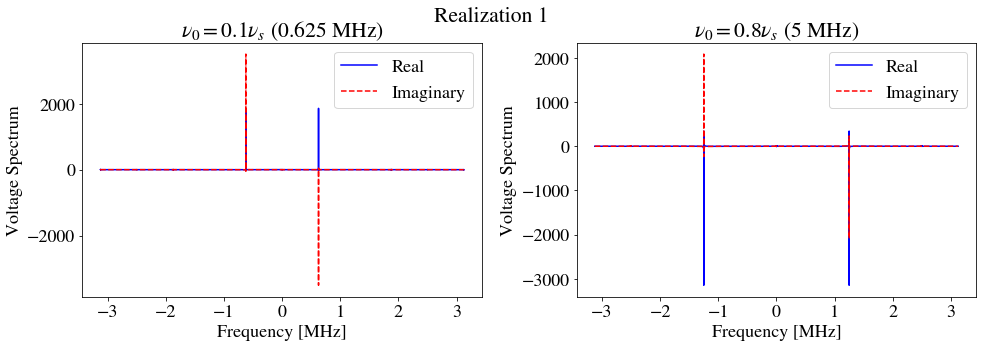

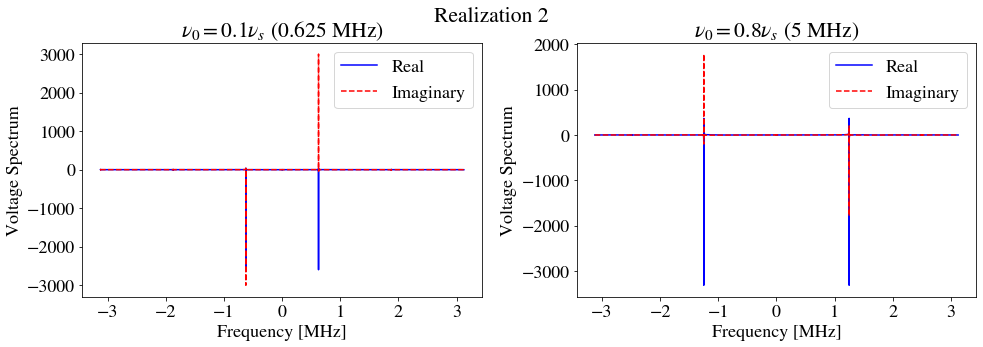

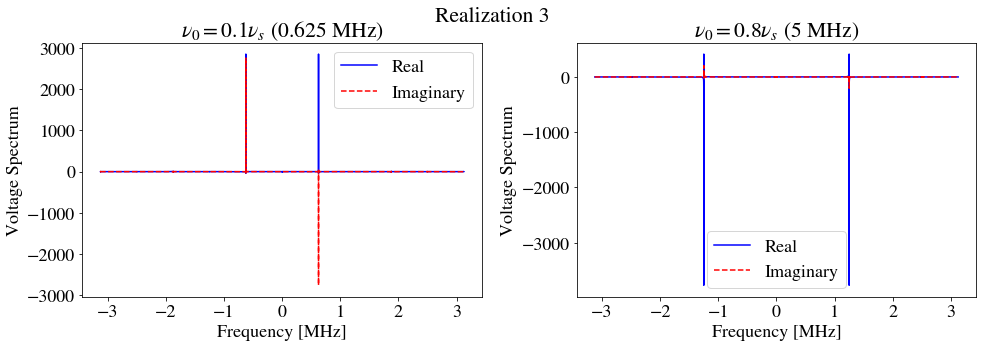

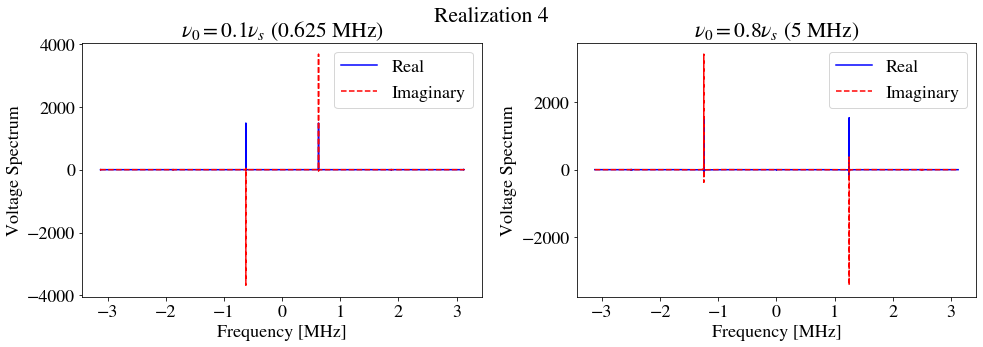

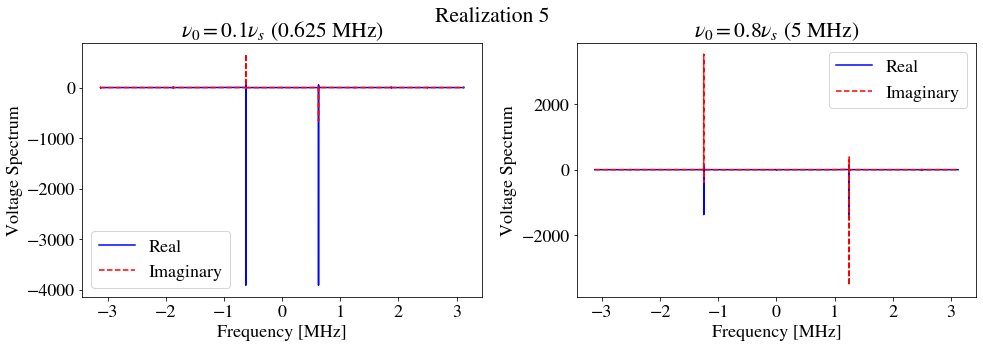

In [8]:
def plot_FT_realizations(index):
    fig, axes = plt.subplots(1,2, figsize=(14, 5))

    fig.suptitle("Realization " + str(index + 1))

    axes[0].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
    axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 np.fft.fftshift(np.fft.fft(array_0p1[index,:]/(2**15)).real), color="blue", label="Real")

    axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 np.fft.fftshift(np.fft.fft(array_0p1[index,:]/(2**15)).imag), color="red",linestyle="--", label="Imaginary")

    axes[0].set_xlabel("Frequency [MHz]")
    axes[0].set_ylabel("Voltage Spectrum")
    axes[0].legend()
    


    axes[1].set_title("$\\nu_0 = 0.8 \\nu_s$ (5 MHz)")
    axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 np.fft.fftshift(np.fft.fft(array_0p8[index,:]/(2**15)).real), color="blue", label="Real")

    axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 np.fft.fftshift(np.fft.fft(array_0p8[index,:]/(2**15)).imag), color="red", linestyle="--", label="Imaginary")

    axes[1].set_xlabel("Frequency [MHz]")
    axes[1].set_ylabel("Voltage Spectrum")
    axes[1].legend()
    fig.tight_layout()
    plt.show()
    
plot_FT_realizations(0)
plot_FT_realizations(1)
plot_FT_realizations(2)
plot_FT_realizations(3)
plot_FT_realizations(4)

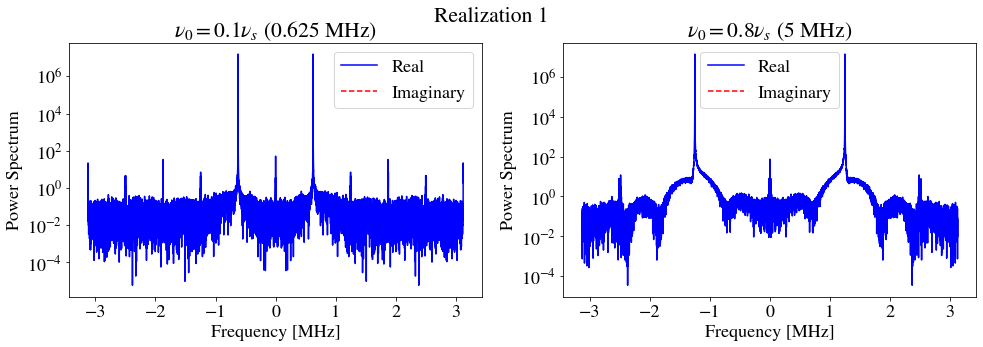

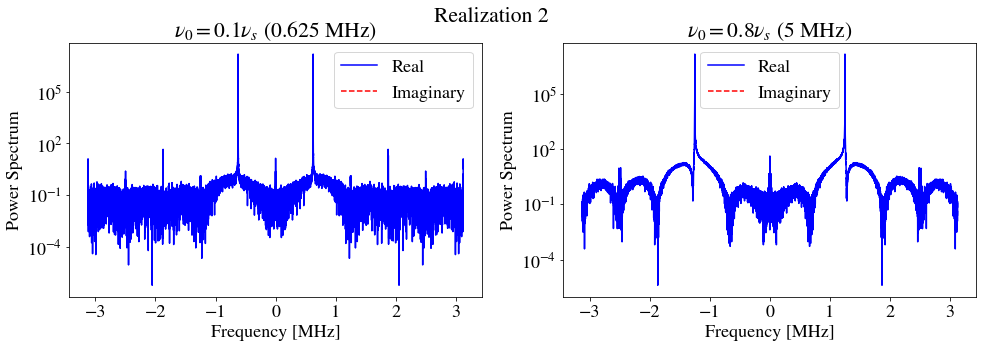

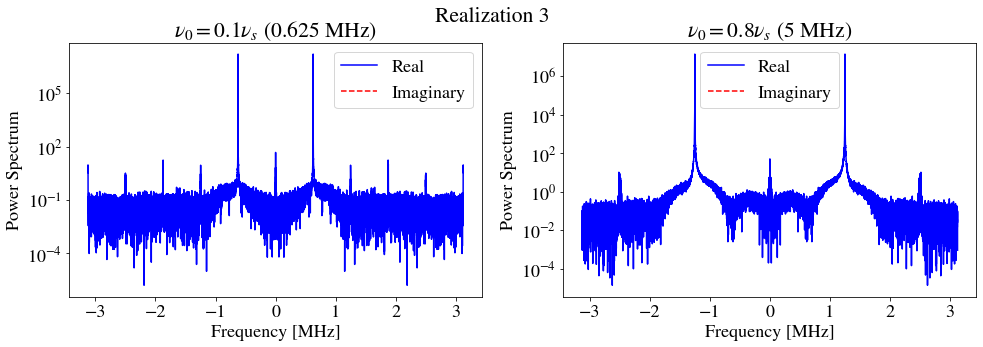

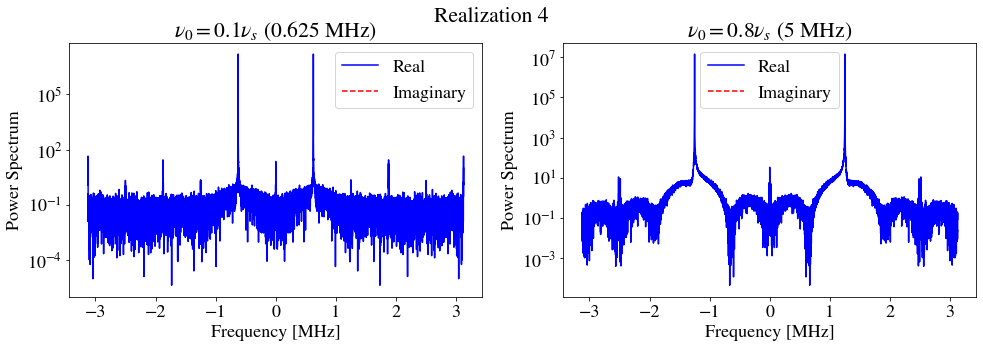

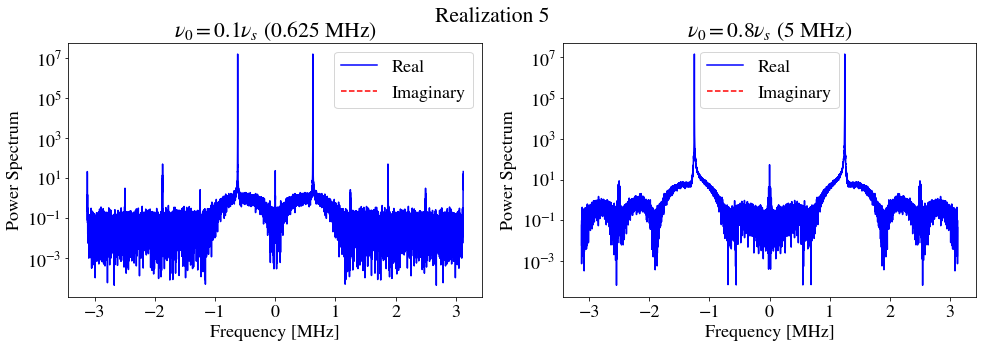

In [9]:
def plot_power_realizations(index):
    fig, axes = plt.subplots(1,2, figsize=(14, 5))

    fig.suptitle("Realization " + str(index + 1))

    axes[0].set_title("$\\nu_0 = 0.1 \\nu_s$ (0.625 MHz)")
    axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 (np.abs(np.fft.fftshift(np.fft.fft(array_0p1[index,:]/(2**15))))**2).real, color="blue", label="Real")

    axes[0].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 (np.abs(np.fft.fftshift(np.fft.fft(array_0p1[index,:]/(2**15))))**2).imag, color="red",linestyle="--", label="Imaginary")

    axes[0].set_xlabel("Frequency [MHz]")
    axes[0].set_ylabel("Power Spectrum")
    axes[0].legend()
    axes[0].semilogy()


    axes[1].set_title("$\\nu_0 = 0.8 \\nu_s$ (5 MHz)")
    axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 (np.abs(np.fft.fftshift(np.fft.fft(array_0p8[index,:]/(2**15))))**2).real, color="blue", label="Real")

    axes[1].plot(np.fft.fftshift(np.fft.fftfreq(16000, 1/ν_s)/1e6), 
                 (np.abs(np.fft.fftshift(np.fft.fft(array_0p8[index,:]/(2**15))))**2).imag, color="red", linestyle="--", label="Imaginary")

    axes[1].set_xlabel("Frequency [MHz]")
    axes[1].set_ylabel("Power Spectrum")
    axes[1].legend()
    axes[1].semilogy()
    fig.tight_layout()
    plt.show()
    
plot_power_realizations(0)
plot_power_realizations(1)
plot_power_realizations(2)
plot_power_realizations(3)
plot_power_realizations(4)

In [100]:
print("Calculating ACF with DFT/np.FFT Manually")
FFT_0p1 = ugradio.dft.dft(array_0p1[0,:]/(2**15))
ACS_dft = ugradio.dft.idft(np.abs(FFT_0p1[1])**2, f=FFT_0p1[0])
ACS_nft = np.fft.fftshift(np.fft.ifft(np.abs(np.fft.fft(array_0p1[0,:]/(2**15)))**2))

In [101]:
print("Calculating ACF with np.correlate & scipy.correlate")
ACS_np = np.correlate(array_0p1[0,:]/(2**15),array_0p1[0,::1]/(2**15), mode='same')
ACS_scipy = sig.correlate(array_0p1[0,:]/(2**15),array_0p1[0,:]/(2**15), mode="same")

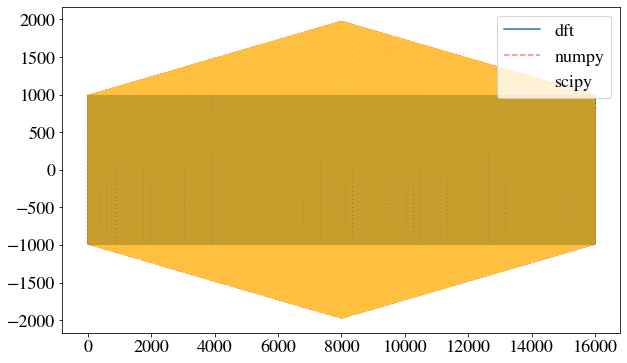

In [77]:
# np.shape(Auto_C_dft)
plt.figure(figsize=(10,6))
plt.plot(ACS_dft[1]/2, label="dft")
# plt.plot(ACS_dft[1]/2 - ACS_nft/2, label="nft")
# plt.plot(ACS_nft/2, label="nft")
plt.plot(ACS_np, linestyle="--",color="red", alpha=0.5, label="numpy")
plt.plot(ACS_scipy, linestyle=":",color="yellow", alpha=0.5, label="scipy")
# plt.xlim(3500,5100)
plt.legend()
# plt.xlim(-100,100)


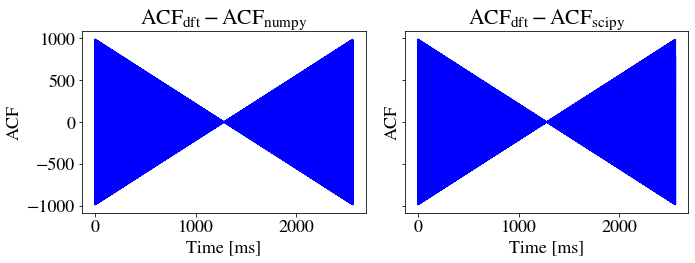

In [96]:
fig, axes = plt.subplots(1,2,sharey=True, figsize=(10,4))

axes[0].plot(times*1e6, ACS_dft[1] - ACS_np, color='blue')
axes[0].set_title("$\\mathrm{ACF}_{\\mathrm{dft}} - \\mathrm{ACF}_{\\mathrm{numpy}}$")
# axes[1].plot(ACS_dft[1] - ACS_dft[1])
# axes[1].set_title("$\\mathrm{ACF}_{\\mathrm{dft}} - \\mathrm{ACF}_{\\mathrm{dft}}$")
axes[1].plot(times*1e6, ACS_dft[1] - ACS_scipy, color='blue')
axes[1].set_title("$\\mathrm{ACF}_{\\mathrm{dft}} - \\mathrm{ACF}_{\\mathrm{scipy}}$")

for i, ax in enumerate(axes):
    ax.set_xlabel("Time [ms]")
    ax.set_ylabel("ACF")

fig.tight_layout()
plt.show()

In [111]:
print("Zero Padding:")
array_0p1_padded = np.zeros(len(array_0p1[0,:]) + 4000)
array_0p1_padded[6000:14000] = array_0p1[0,4000:12000]


print("Calculating ACF with DFT/np.FFT Manually")
FFT_0p1 = ugradio.dft.dft(array_0p1_padded/(2**15))
ACS_dft = ugradio.dft.idft(np.abs(FFT_0p1[1])**2, f=FFT_0p1[0])
ACS_nft = np.fft.fftshift(np.fft.ifft(np.abs(np.fft.fft(array_0p1_padded/(2**15)))**2))

Zero Padding:
Calculating ACF with DFT/np.FFT Manually


In [112]:
print("Calculating ACF with np.correlate & scipy.correlate")
ACS_np = np.correlate(array_0p1_padded/(2**15),array_0p1_padded/(2**15), mode='same')
ACS_scipy = sig.correlate(array_0p1_padded/(2**15),array_0p1_padded/(2**15), mode="same")

Calculating ACF with np.correlate & scipy.correlate


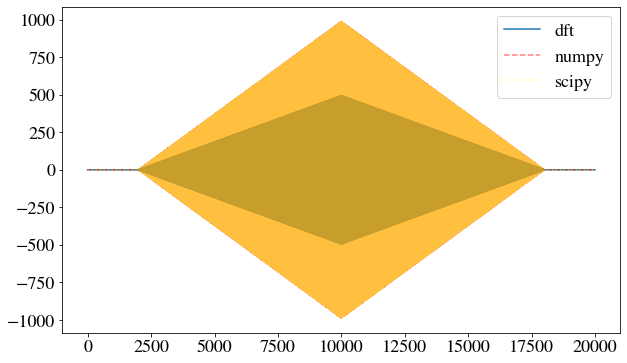

In [113]:
# np.shape(Auto_C_dft)
plt.figure(figsize=(10,6))
plt.plot(ACS_dft[1]/2, label="dft")
# plt.plot(ACS_dft[1]/2 - ACS_nft/2, label="nft")
# plt.plot(ACS_nft/2, label="nft")
plt.plot(ACS_np, linestyle="--",color="red", alpha=0.5, label="numpy")
plt.plot(ACS_scipy, linestyle=":",color="yellow", alpha=0.5, label="scipy")
# plt.xlim(3500,5100)
plt.legend()
# plt.xlim(-100,100)


Note to self for lab write up: The reason there is a discrepancy in ACF between `np.correlate` & `scipy.signal.correlate` with the manual calculation using `dft` and `np.fft.fft` is in the assumptions made about periodicity in the data. Calculating this manually doesn't assume any periodicity in the data, but the underlying functions in the numpy and scipy libraries do assume that there are periodic boundary conditions. To work around this we zero pad the data on the boundaries to make them periodic again. 

# 5.4 Leakage Power

In [ ]:
# COME BACK AND DO

ugradio.dft.dft(array_0p1[0,:]/(2**15), vsamp=10)

# 5.5 Frequency Resolution

In [ ]:
# COME BACK AND DO

# 5.6 Nyquist Windows

In [ ]:
# COME BACK AND DO

# 5.7 - Fourier Transforms of Noise

In [124]:
data_02 = ugradio.pico.capture_data("200mV", divisor=10, nsamples=16000, nblocks=2)
data_04 = ugradio.pico.capture_data("200mV", divisor=10, nsamples=16000, nblocks=4)
data_08 = ugradio.pico.capture_data("200mV", divisor=10, nsamples=16000, nblocks=8)
data_16 = ugradio.pico.capture_data("200mV", divisor=10, nsamples=16000, nblocks=16)

We need to show the distribution of data is gaussian with width = rms of the data. We show that below

In [184]:
def gaussian(x, A, μ, σ):
    """Theoretical Gaussian Function"""
    return A * np.exp(-(x - μ)**2 / (2 * σ**2))

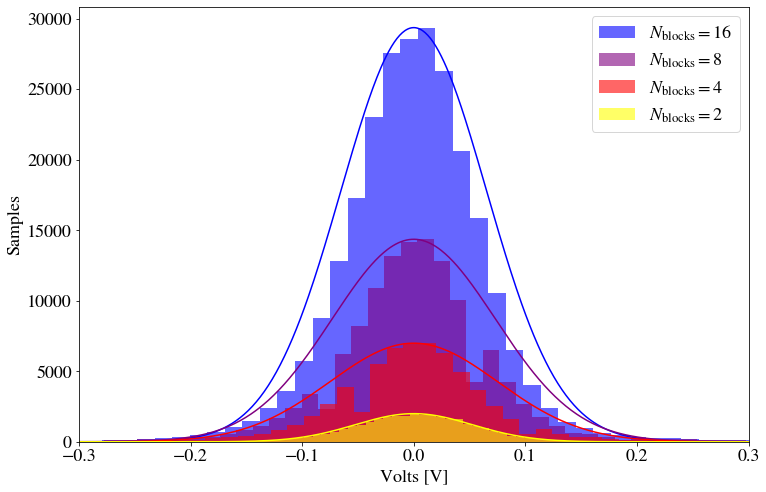

In [183]:
x_lin =np.linspace(-0.6, 0.6, 1000)
nbins = 80
plt.figure(figsize=(12,8))
plt.hist(data_16.flatten()/2**15, bins=nbins, alpha=0.6,label="$N_{\mathrm{blocks}} = 16$", color="blue")
plt.plot(x_lin, gaussian(x_lin, np.max(np.histogram(data_16.flatten()/2**15, bins=nbins)[0]), 0,
                         np.std(data_16.flatten()/2**15)),color="blue")

plt.hist(data_08.flatten()/2**15, bins=nbins, alpha=0.6, label="$N_{\mathrm{blocks}} = 8$", color="purple")
plt.plot(x_lin, gaussian(x_lin, np.max(np.histogram(data_08.flatten()/2**15, bins=nbins)[0]), 0,
                         np.std(data_08.flatten()/2**15)),color="purple")

plt.hist(data_04.flatten()/2**15, bins=nbins, alpha=0.6, label="$N_{\mathrm{blocks}} = 4$", color="red")
plt.plot(x_lin, gaussian(x_lin, np.max(np.histogram(data_04.flatten()/2**15, bins=nbins)[0]), 0,
                         np.std(data_04.flatten()/2**15)),color="red")

plt.hist(data_02.flatten()/2**15, bins=nbins, alpha=0.6, label="$N_{\mathrm{blocks}} = 2$", color="yellow")
plt.plot(x_lin, gaussian(x_lin, np.max(np.histogram(data_02.flatten()/2**15, bins=nbins)[0]), 0,
                         np.std(data_02.flatten()/2**15)),color="yellow")
plt.legend()
plt.xlim(-0.3, 0.3)
plt.xlabel("Volts [V]")
plt.ylabel("Samples")
plt.show()

### Save Noise Data

In [186]:
np.save("blocks_2.npy", data_02)
np.save("blocks_4.npy", data_04)
np.save("blocks_8.npy", data_08)
np.save("blocks_16.npy", data_16)